Q1

In [2]:
import numpy as np


n = int(input("Enter the number of variables: "))
coefficients = []
constants = []

for i in range(2 * n):
    if i % 2 == 0:
        nums = map(int, input("Enter the coefficients of equation " + str(i // 2 + 1) + ": ").split())
        coefficients.append(list(nums))
    else:
        constants.append(int(input("Enter the constant of equation " + str(i // 2 + 1) + ": ")))

In [3]:
def lu_decomposition(matrix, n):
    # initialize L and U
    l = np.zeros((n, n))
    u = np.array(matrix, dtype = float)
    
    # elements on the diagonal of L are 1
    for i in range(n):
        l[i][i] = 1
        
    for i in range(1, n):
        for j in range(i):
            l[i][j] = u[i][j] / u[j][j]
            # print(l)
            c = l[i][j]
            for k in range(n):
                u[i][k] -= c * u[j][k]

    return l, u

L, U = lu_decomposition(coefficients, n)

# solve for y in Ly = b
def forward_substitution(L, n, b):
    y = np.zeros(n)
    for i in range(n):
        if L[i][i] == 0:
            print("Matrix is singular!")
            exit()
        y[i] = b[i]
        for j in range(i):
            y[i] -= L[i][j] * y[j]
        y[i] /= L[i][i]
    return y

y = forward_substitution(L, n, constants)

# solve for x in Ux = y
def backward_substitution(U, n, y):
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        if U[i][i] == 0:
            print("Matrix is singular!")
            exit()
        x[i] = y[i]
        for j in range(i + 1, n):
            x[i] -= U[i][j] * x[j]
        x[i] /= U[i][i]
    return x

x = backward_substitution(U, n, y)

print("The solution is: ", x)


The solution is:  [-1. -2.  3.]


Q2

In [65]:
axis = input("Enter the axis of rotation (x, y or z): ")
angle = int(input("Enter the angle of rotation in degrees: "))
n = int(input("How many 3D points will you input? "))

points = []
for i in range(n):
    points.append(list(map(int, input("Enter the coordinates of point " + str(i + 1) + ": ").split(','))))
    
print(points)

[[1, 1, 1], [0, 1, 2]]


In [66]:
def rotate(axis, angle, points):
    angle = np.radians(angle)
    if axis == 'x':
        rotation_matrix = np.array([[1, 0, 0],
                                     [0, np.cos(angle), -np.sin(angle)],
                                     [0, np.sin(angle), np.cos(angle)]])
    elif axis == 'y':
        rotation_matrix = np.array([[np.cos(angle), 0, np.sin(angle)],
                                     [0, 1, 0],
                                     [-np.sin(angle), 0, np.cos(angle)]])
    elif axis == 'z':
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                                     [np.sin(angle), np.cos(angle), 0],
                                     [0, 0, 1]])
        
    else:
        print("Invalid axis of rotation!")
        exit()
        
    # check the orthogonality of the matrix
    for i in range(3):
        for j in range(3):
            if i == j:
                assert np.isclose(np.dot(rotation_matrix[i], rotation_matrix[j]), 1)
            else:
                assert np.isclose(np.dot(rotation_matrix[i], rotation_matrix[j]), 0)
    
    return np.dot(points, rotation_matrix)

[[1.         1.3660254  0.3660254 ]
 [0.         1.8660254  1.23205081]]


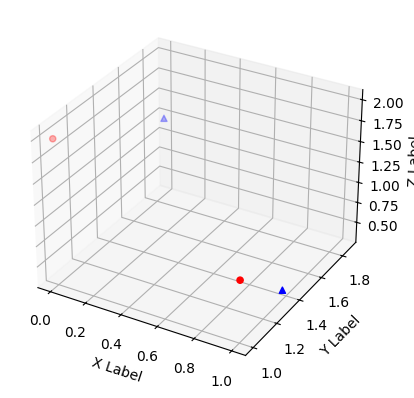

In [67]:
import matplotlib.pyplot as plt

rotated_points = rotate(axis, angle, points)
print(rotated_points)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([point[0] for point in points], [point[1] for point in points], [point[2] for point in points], c='r', marker='o')
ax.scatter([point[0] for point in rotated_points], [point[1] for point in rotated_points], [point[2] for point in rotated_points], c='b', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()